<a href="https://colab.research.google.com/github/TarunReddyKethireddy/Sales-Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Breakdown of Sales by Source:
Mar 2023 - Mar 2024:
City Hive (Total Amount): $2,583,923.37
Uber Eats (Total ): $182,998.40
DoorDash (Credit): $1,942.03
Flaviar (Target Earning): $0.00
Combined Total: $2,768,863.80

Mar 2024 - Mar 2025:
City Hive (Total Amount): $2,265,523.17
Uber Eats (Total ): $791,681.78
DoorDash (Credit): $165,697.71
Flaviar (Target Earning): $33,101.69
Combined Total: $3,256,004.35

Overall Sales Growth Rate (Mar 2023-Mar 2024 to Mar 2024-Mar 2025): 17.59%


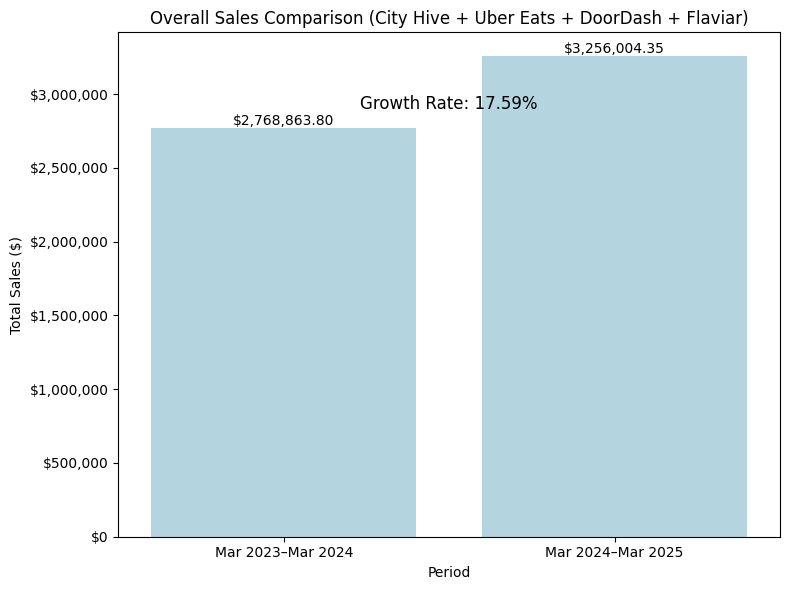

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from google.colab import files


# Load the data
city_hive_df = pd.read_excel('/content/City Hive YTD.xlsx')
uber_df = pd.read_excel('/content/Uber YTD.xlsx')
doordash_df = pd.read_excel('/content/Doordash YTD.xlsx')
Flaviar_df = pd.read_excel('/content/Flaviar YTD.xlsx')
# Convert Excel serial dates to datetime
# City Hive: Time column (already in datetime format based on prior context)
city_hive_df['Date'] = city_hive_df['Time']
# Uber Eats: Order Date column
uber_df['Date'] = uber_df['Order Date']
# DoorDash: Date column
doordash_df['Date'] = doordash_df['Date']
Flaviar_df['Date']= Flaviar_df ['Date']

# Define the two periods
period1_start = '2023-03-01'
period1_end = '2024-03-31'
period2_start = '2024-03-01'
period2_end = '2025-03-31'

# Filter data for the two periods
# Period 1: Mar 2023 - Mar 2024
city_hive_p1 = city_hive_df[(city_hive_df['Date'] >= period1_start) & (city_hive_df['Date'] <= period1_end)]
uber_p1 = uber_df[(uber_df['Date'] >= period1_start) & (uber_df['Date'] <= period1_end)]
doordash_p1 = doordash_df[(doordash_df['Date'] >= period1_start) & (doordash_df['Date'] <= period1_end)]
Flaviar_p1 = Flaviar_df[(Flaviar_df['Date'] >= period1_start) & (Flaviar_df['Date'] <= period1_end)]
# Period 2: Mar 2024 - Mar 2025
city_hive_p2 = city_hive_df[(city_hive_df['Date'] >= period2_start) & (city_hive_df['Date'] <= period2_end)]
uber_p2 = uber_df[(uber_df['Date'] >= period2_start) & (uber_df['Date'] <= period2_end)]
doordash_p2 = doordash_df[(doordash_df['Date'] >= period2_start) & (doordash_df['Date'] <= period2_end)]
Flaviar_p2 = Flaviar_df[(Flaviar_df['Date'] >= period2_start) & (Flaviar_df['Date'] <= period2_end)]
# Calculate total sales for each dataset and period
# City Hive: Total Amount
city_hive_sales_p1 = city_hive_p1['Disbursement Plus Cityhive Credit'].sum()
city_hive_sales_p2 = city_hive_p2['Disbursement Plus Cityhive Credit'].sum()

# Uber Eats: Total payout
uber_sales_p1 = 182998.40
uber_sales_p2 = uber_p2['Total '].sum()

# DoorDash: Credit
doordash_sales_p1 = doordash_p1['Credit'].sum()
doordash_sales_p2 = doordash_p2['Credit'].sum()

Flaviar_sales_p1 = Flaviar_p1['Target Earning'].sum()
Flaviar_sales_p2 = Flaviar_p2['Target Earning'].sum()

# Combine totals for each period
total_sales_p1 = city_hive_sales_p1 + uber_sales_p1 + doordash_sales_p1 + Flaviar_sales_p1
total_sales_p2 = city_hive_sales_p2 + doordash_sales_p2 + Flaviar_sales_p2 + uber_sales_p2

# Calculate overall sales growth rate
# Growth Rate (%) = ((Total Sales Period 2 - Total Sales Period 1) / Total Sales Period 1) * 100
if total_sales_p1 != 0:  # Avoid division by zero
    overall_growth_rate = ((total_sales_p2 - total_sales_p1) / total_sales_p1) * 100
else:
    overall_growth_rate = 0  # If Period 1 sales are 0, growth rate is undefined; set to 0 for display

# Print the total sales and growth rate
print("\nBreakdown of Sales by Source:")
print("Mar 2023 - Mar 2024:")
print(f"City Hive (Total Amount): ${city_hive_sales_p1:,.2f}")
print(f"Uber Eats (Total ): ${uber_sales_p1:,.2f}")
print(f"DoorDash (Credit): ${doordash_sales_p1:,.2f}")
print(f"Flaviar (Target Earning): ${Flaviar_sales_p1:,.2f}")
print(f"Combined Total: ${total_sales_p1:,.2f}")
print("\nMar 2024 - Mar 2025:")
print(f"City Hive (Total Amount): ${city_hive_sales_p2:,.2f}")
print(f"Uber Eats (Total ): ${uber_sales_p2:,.2f}")
print(f"DoorDash (Credit): ${doordash_sales_p2:,.2f}")
print(f"Flaviar (Target Earning): ${Flaviar_sales_p2:,.2f}")
print(f"Combined Total: ${total_sales_p2:,.2f}")
print(f"\nOverall Sales Growth Rate (Mar 2023-Mar 2024 to Mar 2024-Mar 2025): {overall_growth_rate:.2f}%")

# Create bar plot to compare total sales
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=['Mar 2023–Mar 2024', 'Mar 2024–Mar 2025'], y=[total_sales_p1, total_sales_p2], color='lightblue')

# Add labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'${height:,.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Format y-axis to show complete figures
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set labels and title
plt.title('Overall Sales Comparison (City Hive + Uber Eats + DoorDash + Flaviar)')
plt.ylabel('Total Sales ($)')
plt.xlabel('Period')

# Add growth rate annotation on the plot
plt.text(0.5, max(total_sales_p1, total_sales_p2) * 0.9,
         f'Growth Rate: {overall_growth_rate:.2f}%',
         ha='center',
         va='center',
         fontsize=12,
         color='black')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
plt.savefig('overall_sales_comparison.png')
plt.show()

# Download the plot
files.download('overall_sales_comparison.png')


Total Sales by Month (Mar 2023 - Mar 2025):
02/2024: $-24.99
03/2024: $30,751.88
04/2024: $50,688.51
05/2024: $48,616.85
06/2024: $59,008.07
07/2024: $57,271.39
08/2024: $59,218.56
09/2024: $57,610.10
10/2024: $57,831.12
11/2024: $72,387.31
12/2024: $96,066.89
01/2025: $62,854.48
02/2025: $74,409.00
03/2025: $64,967.62


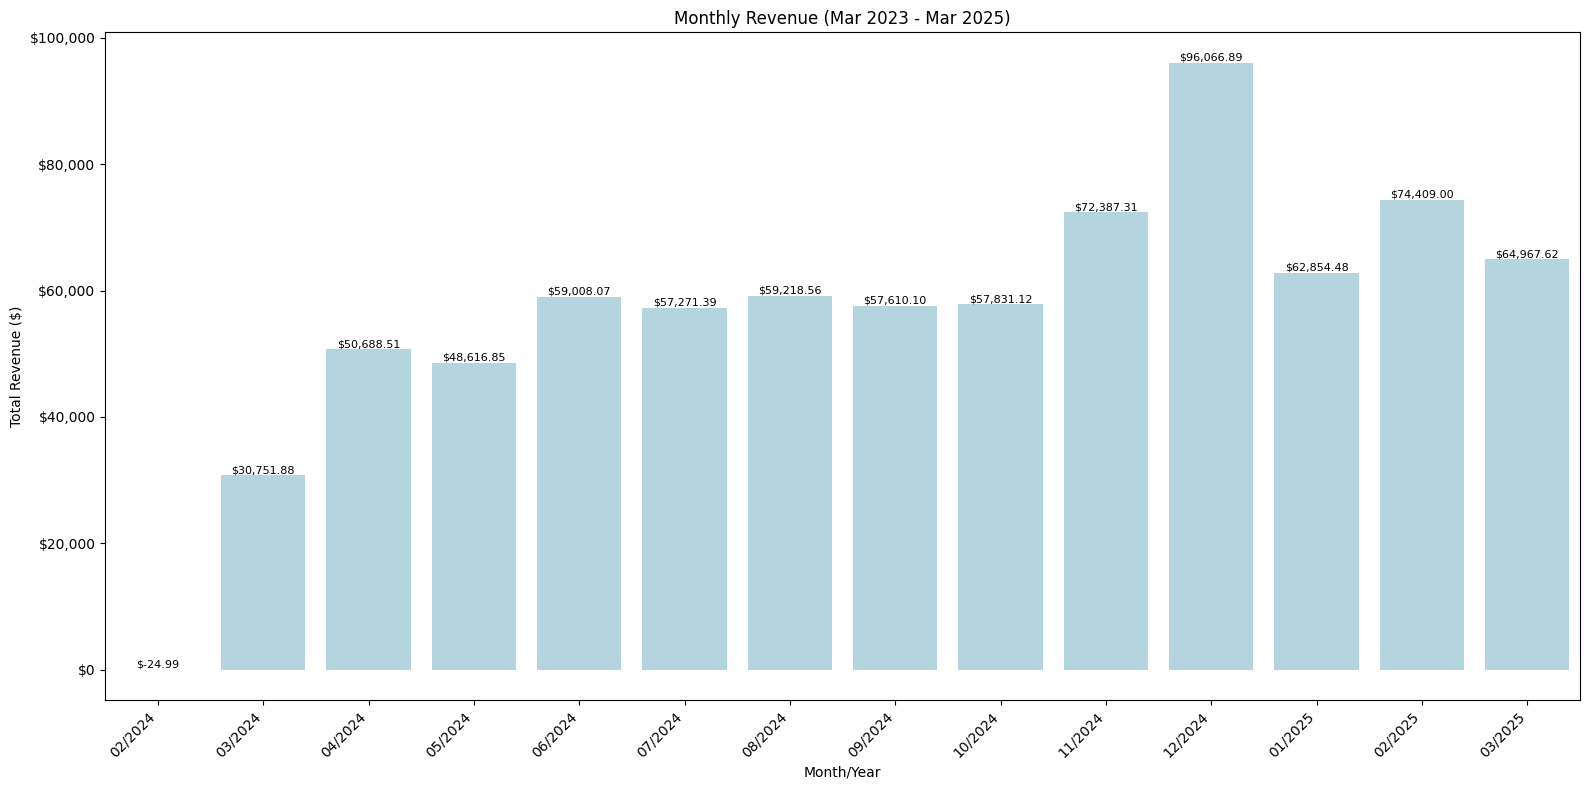

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Extract year and month for grouping
uber_df['Month_Year'] = uber_df['Date'].dt.strftime('%m/%Y')

# Calculate total sales (using Total payout column) by month
monthly_sales = uber_df.groupby('Month_Year')['Total '].sum().reset_index()
monthly_sales['Total '] = monthly_sales['Total '].round(2)

# Sort by Month_Year to ensure chronological order
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['Month_Year'], format='%m/%Y')
monthly_sales = monthly_sales.sort_values('YearMonth')
monthly_sales = monthly_sales.drop(columns='YearMonth')

# Print total sales by month
print("\nTotal Sales by Month (Mar 2023 - Mar 2025):")
for index, row in monthly_sales.iterrows():
    print(f"{row['Month_Year']}: ${row['Total ']:,.2f}")

# Create bar plot (histogram-style) for monthly sales
plt.figure(figsize=(16, 8))
bars = sns.barplot(x='Month_Year', y='Total ', data=monthly_sales, color='lightblue')

# Add labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'${height:,.2f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

# Format y-axis to show complete figures
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set labels and title
plt.title('Monthly Revenue (Mar 2023 - Mar 2025)')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Month/Year')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
plt.savefig('monthly_revenue.png')
plt.show()

# Download the plot
files.download('monthly_revenue.png')


Total Sales (Credit) by Month (Mar 2023 - Mar 2025):
03/2024: $1,942.03
04/2024: $2,912.35
05/2024: $4,688.51
06/2024: $5,631.06
07/2024: $7,028.68
08/2024: $9,946.47
09/2024: $12,522.27
10/2024: $12,287.60
11/2024: $22,501.28
12/2024: $29,843.15
01/2025: $17,358.52
02/2025: $19,328.88
03/2025: $19,706.91


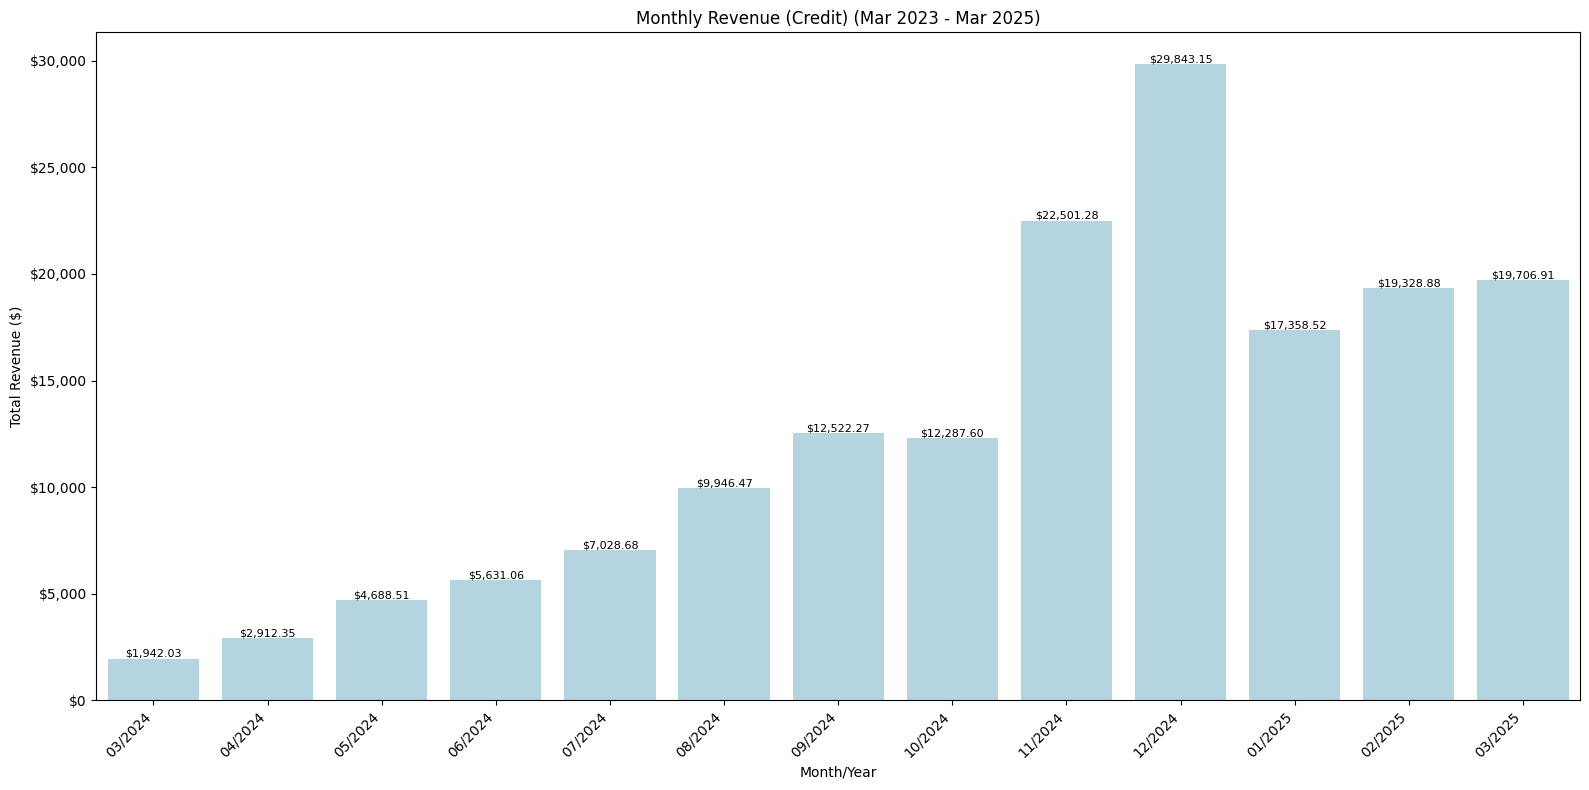

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker



# Load the data
df = pd.read_excel('/content/Doordash YTD.xlsx')

# Use the Time column as is (already in datetime format)
df['Date'] = df['Date']

# Filter data for March 2023 to March 2025
df = df[(df['Date'] >= '2023-03-01') & (df['Date'] <= '2025-03-31')]

# Extract year and month for grouping
df['Month_Year'] = df['Date'].dt.strftime('%m/%Y')

# Calculate total sales (using Credit column) by month
monthly_sales = df.groupby('Month_Year')['Credit'].sum().reset_index()
monthly_sales['Credit'] = monthly_sales['Credit'].round(2)

# Sort by Month_Year to ensure chronological order
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['Month_Year'], format='%m/%Y')
monthly_sales = monthly_sales.sort_values('YearMonth')
monthly_sales = monthly_sales.drop(columns='YearMonth')

# Print total sales by month
print("\nTotal Sales (Credit) by Month (Mar 2023 - Mar 2025):")
for index, row in monthly_sales.iterrows():
    print(f"{row['Month_Year']}: ${row['Credit']:,.2f}")

# Create bar plot (histogram-style) for monthly sales
plt.figure(figsize=(16, 8))
bars = sns.barplot(x='Month_Year', y='Credit', data=monthly_sales, color='lightblue')

# Add labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'${height:,.2f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

# Format y-axis to show complete figures
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set labels and title
plt.title('Monthly Revenue (Credit) (Mar 2023 - Mar 2025)')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Month/Year')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
plt.savefig('monthly_revenue.png')
plt.show()

# Download the plot
files.download('monthly_revenue.png')


Total Number of New Customers (City Hive):
Mar 2023 - Mar 2024: 4118
Mar 2024 - Mar 2025: 1979
Percentage Change in New Customers: -51.94%


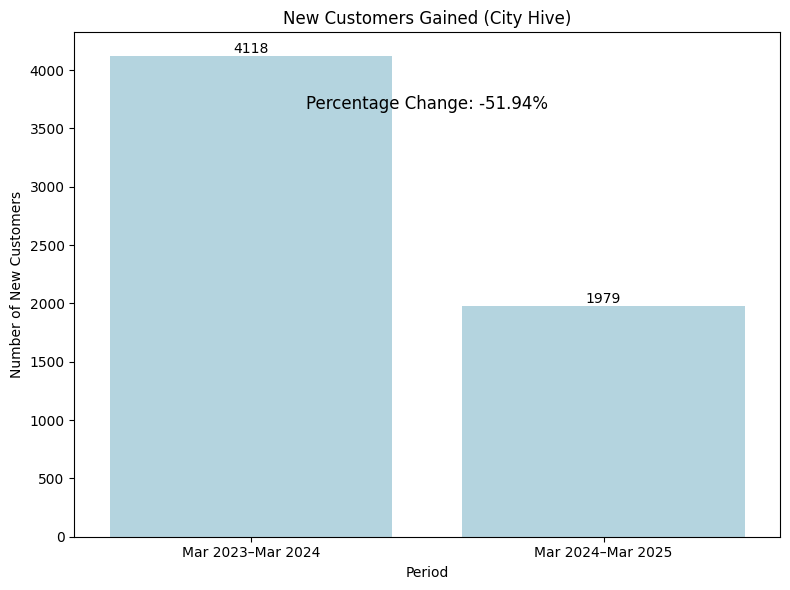

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


# Load the data
city_hive_df = pd.read_excel('/content/City Hive YTD.xlsx')

# Use the Time column as is (already in datetime format)
city_hive_df['Date'] = city_hive_df['Time']

# Define the two periods
period1_start = '2023-03-01'
period1_end = '2024-03-31'
period2_start = '2024-03-01'
period2_end = '2025-03-31'

# Step 1: Find the first purchase date for each customer
# Group by Payment Sender Email and get the earliest purchase date
first_purchase = city_hive_df.groupby('Payment Sender Email')['Date'].min().reset_index()
first_purchase.columns = ['Payment Sender Email', 'First_Purchase_Date']

# Merge the first purchase date back to the original dataframe
city_hive_df = city_hive_df.merge(first_purchase, on='Payment Sender Email', how='left')

# Step 2: Identify new customers for each period
# New customers in Period 1: First purchase between Mar 2023 and Mar 2024
new_customers_p1 = first_purchase[
    (first_purchase['First_Purchase_Date'] >= period1_start) &
    (first_purchase['First_Purchase_Date'] <= period1_end)
]

# New customers in Period 2: First purchase between Mar 2024 and Mar 2025
new_customers_p2 = first_purchase[
    (first_purchase['First_Purchase_Date'] >= period2_start) &
    (first_purchase['First_Purchase_Date'] <= period2_end)
]

# Step 3: Count the number of new customers in each period
new_customers_count_p1 = new_customers_p1['Payment Sender Email'].nunique()
new_customers_count_p2 = new_customers_p2['Payment Sender Email'].nunique()

# Step 4: Calculate the percentage change in new customers
# Percentage Change (%) = ((Count Period 2 - Count Period 1) / Count Period 1) * 100
if new_customers_count_p1 != 0:  # Avoid division by zero
    percentage_change = ((new_customers_count_p2 - new_customers_count_p1) / new_customers_count_p1) * 100
else:
    percentage_change = 0  # If Period 1 count is 0, percentage change is undefined; set to 0 for display

# Print the results
print("\nTotal Number of New Customers (City Hive):")
print(f"Mar 2023 - Mar 2024: {new_customers_count_p1}")
print(f"Mar 2024 - Mar 2025: {new_customers_count_p2}")
print(f"Percentage Change in New Customers: {percentage_change:.2f}%")

# Create bar plot to compare new customers
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=['Mar 2023–Mar 2024', 'Mar 2024–Mar 2025'],
                   y=[new_customers_count_p1, new_customers_count_p2],
                   color='lightblue')

# Add labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',  # Display as integer since it's a count
        ha='center',
        va='bottom',
        fontsize=10
    )

# Format y-axis to show complete figures (integers)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))

# Set labels and title
plt.title('New Customers Gained (City Hive)')
plt.ylabel('Number of New Customers')
plt.xlabel('Period')

# Add percentage change annotation on the plot
plt.text(0.5, max(new_customers_count_p1, new_customers_count_p2) * 0.9,
         f'Percentage Change: {percentage_change:.2f}%',
         ha='center',
         va='center',
         fontsize=12,
         color='black')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
plt.savefig('new_customers_comparison.png')
plt.show()

# Download the plot
files.download('new_customers_comparison.png')


Total Number of Purchases (City Hive):
Mar 2023 - Mar 2024: 12443
Mar 2024 - Mar 2025: 10509
Percentage Change in Purchases: -15.54%


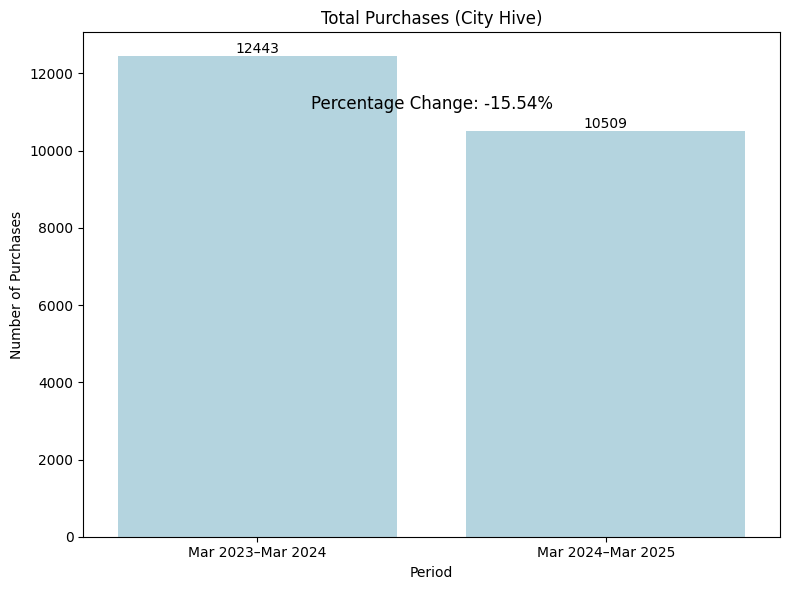

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker



city_hive_df = pd.read_excel('/content/City Hive YTD.xlsx')

# Use the Time column as is (already in datetime format)
city_hive_df['Date'] = city_hive_df['Time']

# Define the two periods
period1_start = '2023-03-01'
period1_end = '2024-03-31'
period2_start = '2024-03-01'
period2_end = '2025-03-31'

# Filter data for the two periods
# Period 1: Mar 2023 - Mar 2024
purchases_p1 = city_hive_df[
    (city_hive_df['Date'] >= period1_start) &
    (city_hive_df['Date'] <= period1_end)
]

# Period 2: Mar 2024 - Mar 2025
purchases_p2 = city_hive_df[
    (city_hive_df['Date'] >= period2_start) &
    (city_hive_df['Date'] <= period2_end)
]

# Count the total number of purchases in each period
# Assuming each row represents a purchase
purchases_count_p1 = len(purchases_p1)
purchases_count_p2 = len(purchases_p2)

# Calculate the percentage change in purchases
# Percentage Change (%) = ((Count Period 2 - Count Period 1) / Count Period 1) * 100
if purchases_count_p1 != 0:  # Avoid division by zero
    percentage_change = ((purchases_count_p2 - purchases_count_p1) / purchases_count_p1) * 100
else:
    percentage_change = 0  # If Period 1 count is 0, percentage change is undefined; set to 0 for display

# Print the results
print("\nTotal Number of Purchases (City Hive):")
print(f"Mar 2023 - Mar 2024: {purchases_count_p1}")
print(f"Mar 2024 - Mar 2025: {purchases_count_p2}")
print(f"Percentage Change in Purchases: {percentage_change:.2f}%")

# Create bar plot to compare purchases
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=['Mar 2023–Mar 2024', 'Mar 2024–Mar 2025'],
                   y=[purchases_count_p1, purchases_count_p2],
                   color='lightblue')

# Add labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',  # Display as integer since it's a count
        ha='center',
        va='bottom',
        fontsize=10
    )

# Format y-axis to show complete figures (integers)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))

# Set labels and title
plt.title('Total Purchases (City Hive)')
plt.ylabel('Number of Purchases')
plt.xlabel('Period')

# Add percentage change annotation on the plot
plt.text(0.5, max(purchases_count_p1, purchases_count_p2) * 0.9,
         f'Percentage Change: {percentage_change:.2f}%',
         ha='center',
         va='center',
         fontsize=12,
         color='black')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
plt.savefig('purchases_comparison.png')
plt.show()

# Download the plot
files.download('purchases_comparison.png')


Total Number of Customers (City Hive):
Mar 2023 - Mar 2024: 4118
Mar 2024 - Mar 2025: 3381
Percentage Change in Customers: -17.90%


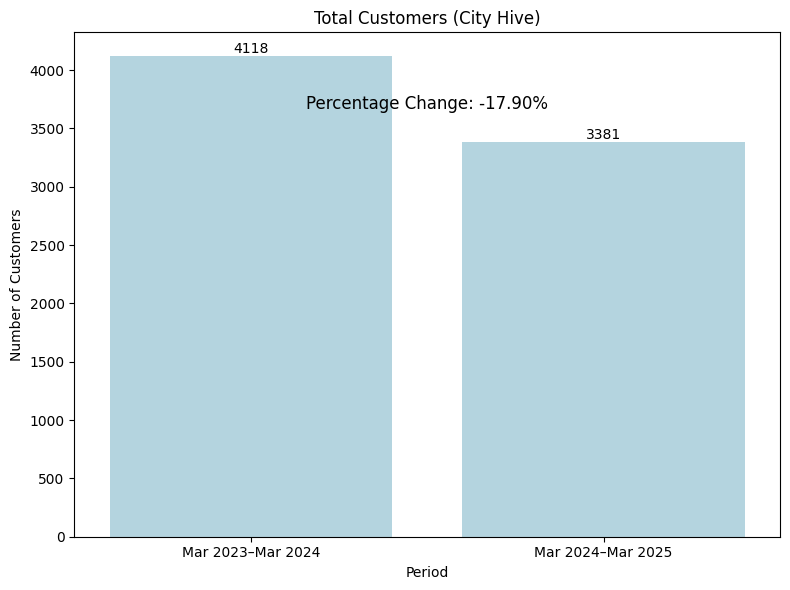

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker



# Load the data
city_hive_df = pd.read_excel('/content/City Hive YTD.xlsx')

# Use the Time column as is (already in datetime format)
city_hive_df['Date'] = city_hive_df['Time']

# Define the two periods
period1_start = '2023-03-01'
period1_end = '2024-03-31'
period2_start = '2024-03-01'
period2_end = '2025-03-31'

# Filter data for the two periods
# Period 1: Mar 2023 - Mar 2024
customers_p1 = city_hive_df[
    (city_hive_df['Date'] >= period1_start) &
    (city_hive_df['Date'] <= period1_end)
]

# Period 2: Mar 2024 - Mar 2025
customers_p2 = city_hive_df[
    (city_hive_df['Date'] >= period2_start) &
    (city_hive_df['Date'] <= period2_end)
]

# Count the total number of unique customers in each period
# Use Payment Sender Email to identify distinct customers
customers_count_p1 = customers_p1['Payment Sender Email'].nunique()
customers_count_p2 = customers_p2['Payment Sender Email'].nunique()

# Calculate the percentage change in customers
# Percentage Change (%) = ((Count Period 2 - Count Period 1) / Count Period 1) * 100
if customers_count_p1 != 0:  # Avoid division by zero
    percentage_change = ((customers_count_p2 - customers_count_p1) / customers_count_p1) * 100
else:
    percentage_change = 0  # If Period 1 count is 0, percentage change is undefined; set to 0 for display

# Print the results
print("\nTotal Number of Customers (City Hive):")
print(f"Mar 2023 - Mar 2024: {customers_count_p1}")
print(f"Mar 2024 - Mar 2025: {customers_count_p2}")
print(f"Percentage Change in Customers: {percentage_change:.2f}%")

# Create bar plot to compare customers
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=['Mar 2023–Mar 2024', 'Mar 2024–Mar 2025'],
                   y=[customers_count_p1, customers_count_p2],
                   color='lightblue')

# Add labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',  # Display as integer since it's a count
        ha='center',
        va='bottom',
        fontsize=10
    )

# Format y-axis to show complete figures (integers)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))

# Set labels and title
plt.title('Total Customers (City Hive)')
plt.ylabel('Number of Customers')
plt.xlabel('Period')

# Add percentage change annotation on the plot
plt.text(0.5, max(customers_count_p1, customers_count_p2) * 0.9,
         f'Percentage Change: {percentage_change:.2f}%',
         ha='center',
         va='center',
         fontsize=12,
         color='black')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
plt.savefig('customers_comparison.png')
plt.show()

# Download the plot
files.download('customers_comparison.png')


Sales Breakdown (Mar 2024 - Mar 2025):
City Hive Sales: $2,345,659.38 (71.02%)
Uber Eats Sales: $791,681.78 (23.97%)
DoorDash Sales: $165,697.71 (5.02%)
Flaviar Sales: $33,101.69
Overall Sales: $3,303,038.87


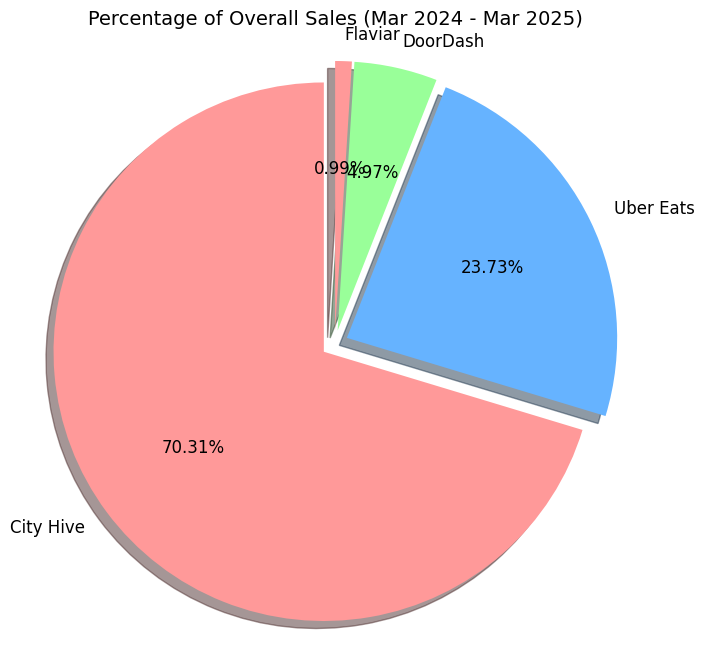

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt



# Load the data
city_hive_df = pd.read_excel('/content/City Hive YTD.xlsx')
uber_df = pd.read_excel('/content/Uber YTD.xlsx')
doordash_df = pd.read_excel('/content/Doordash YTD.xlsx')
Flaviar_df = pd.read_excel('/content/Flaviar YTD.xlsx')

# Convert Excel serial dates to datetime
# City Hive: Time column (already in datetime format)
city_hive_df['Date'] = city_hive_df['Time']
# Uber Eats: Order Date column
uber_df['Date'] = uber_df['Order Date']
# DoorDash: Date column
doordash_df['Date'] = doordash_df['Date']
Flaviar_df['Date'] = Flaviar_df['Date']

# Define the period
period_start = '2024-03-01'
period_end = '2025-03-31'

# Filter data for the period Mar 2024 - Mar 2025
city_hive_period = city_hive_df[(city_hive_df['Date'] >= period_start) & (city_hive_df['Date'] <= period_end)]
uber_period = uber_df[(uber_df['Date'] >= period_start) & (uber_df['Date'] <= period_end)]
doordash_period = doordash_df[(doordash_df['Date'] >= period_start) & (doordash_df['Date'] <= period_end)]
Flaviar_period = Flaviar_df[(Flaviar_df['Date'] >= period_start) & (Flaviar_df['Date'] <= period_end)]

# Calculate total sales for each platform
city_hive_sales = city_hive_period['Total Amount'].sum()
uber_sales = uber_period['Total '].sum()
doordash_sales = doordash_period['Credit'].sum()
Flaviar_sales = Flaviar_period['Target Earning'].sum()

# Calculate overall sales
overall_sales = city_hive_sales + uber_sales + doordash_sales

# Calculate percentages
if overall_sales > 0:  # Avoid division by zero
    city_hive_percentage = (city_hive_sales / overall_sales) * 100
    uber_percentage = (uber_sales / overall_sales) * 100
    doordash_percentage = (doordash_sales / overall_sales) * 100
    Flaviar_percentage = (Flaviar_sales / overall_sales) * 100
else:
    city_hive_percentage = uber_percentage = doordash_percentage = 0

# Print the results
print("\nSales Breakdown (Mar 2024 - Mar 2025):")
print(f"City Hive Sales: ${city_hive_sales:,.2f} ({city_hive_percentage:.2f}%)")
print(f"Uber Eats Sales: ${uber_sales:,.2f} ({uber_percentage:.2f}%)")
print(f"DoorDash Sales: ${doordash_sales:,.2f} ({doordash_percentage:.2f}%)")
print(f"Flaviar Sales: ${Flaviar_sales:,.2f}")
print(f"Overall Sales: ${overall_sales:,.2f}")

# Create pie chart
labels = ['City Hive', 'Uber Eats', 'DoorDash', 'Flaviar']
sizes = [city_hive_percentage, uber_percentage, doordash_percentage, Flaviar_percentage]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.05, 0.05, 0.05, 0.05)  # Slightly separate each slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',
        shadow=True, startangle=90, textprops={'fontsize': 12})
plt.title('Percentage of Overall Sales (Mar 2024 - Mar 2025)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle

# Save and show the plot
plt.savefig('sales_percentage_piechart.png')
plt.show()

# Download the plot
files.download('sales_percentage_piechart.png')

In [9]:
# Import libraries
import pandas as pd



# Load the data
city_hive_df = pd.read_excel('/content/City Hive YTD.xlsx')

# Use the Time column as is (already in datetime format)
city_hive_df['Date'] = city_hive_df['Time']

# Define the two periods
period1_start = '2023-03-01'
period1_end = '2024-03-31'
period2_start = '2024-03-01'
period2_end = '2025-03-31'

# Filter data for the two periods
# Period 1: Mar 2023 - Mar 2024
customers_p1 = city_hive_df[
    (city_hive_df['Date'] >= period1_start) &
    (city_hive_df['Date'] <= period1_end)
]

# Period 2: Mar 2024 - Mar 2025
customers_p2 = city_hive_df[
    (city_hive_df['Date'] >= period2_start) &
    (city_hive_df['Date'] <= period2_end)
]

# Count the total number of unique customers in each period
# Use Payment Sender Email to identify distinct customers
customers_count_p1 = customers_p1['Payment Sender Email'].nunique()
customers_count_p2 = customers_p2['Payment Sender Email'].nunique()

# Calculate the total number of unique customers across both periods
# Combine the unique customers from both periods and remove duplicates
unique_customers_p1 = set(customers_p1['Payment Sender Email'].unique())
unique_customers_p2 = set(customers_p2['Payment Sender Email'].unique())
total_unique_customers = len(unique_customers_p1.union(unique_customers_p2))

# Print the results
print("\nTotal Number of Unique Customers (City Hive):")
print(f"Mar 2023 - Mar 2024: {customers_count_p1}")
print(f"Mar 2024 - Mar 2025: {customers_count_p2}")
print(f"Total Unique Customers (Mar 2023 - Mar 2025): {total_unique_customers}")


Total Number of Unique Customers (City Hive):
Mar 2023 - Mar 2024: 4118
Mar 2024 - Mar 2025: 3381
Total Unique Customers (Mar 2023 - Mar 2025): 5937


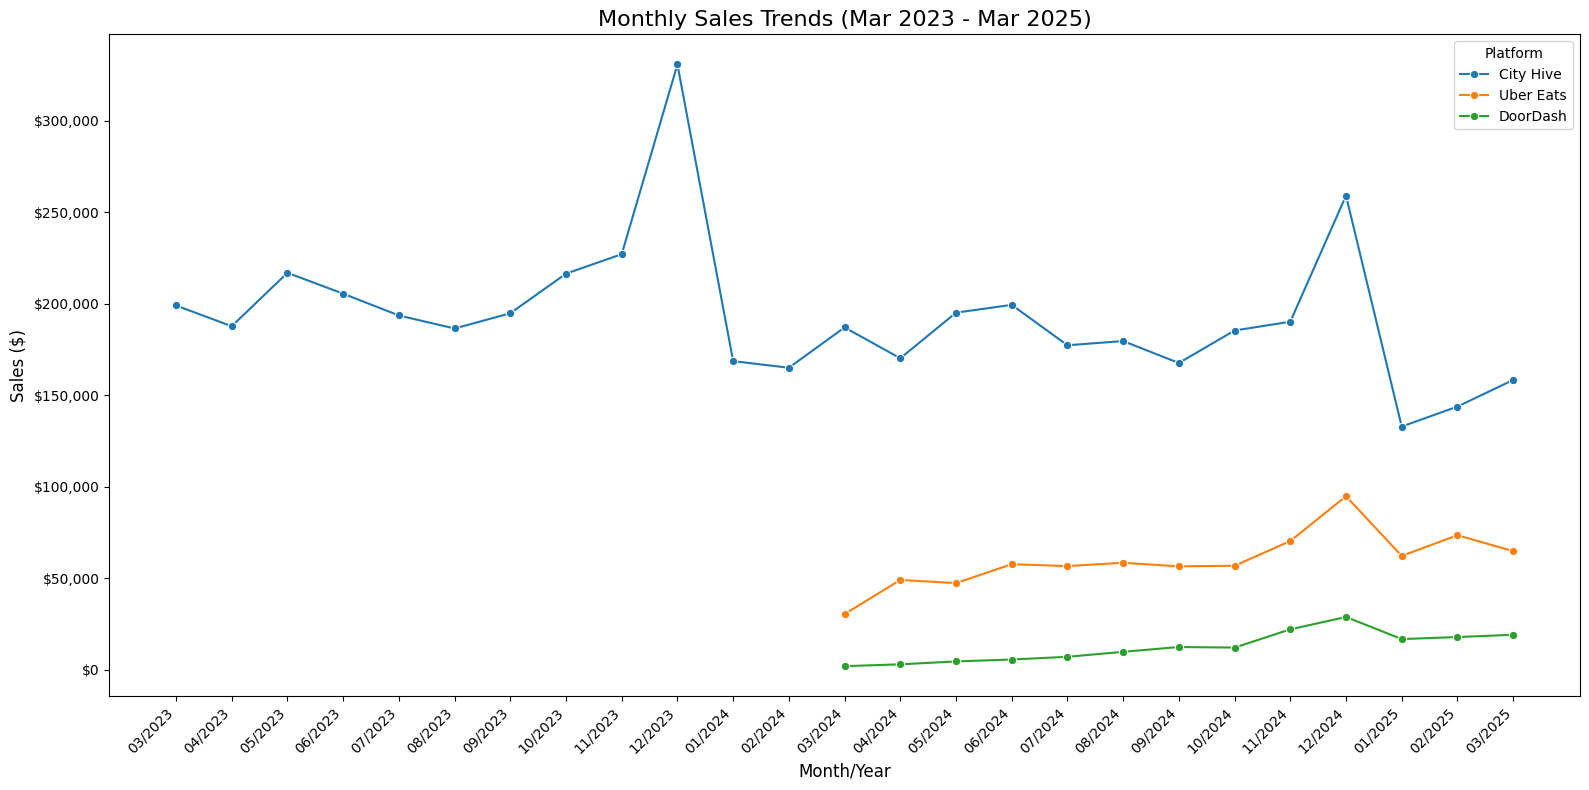

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Monthly Sales Data (Mar 2023 - Mar 2025):

City Hive:
03/2023: $199,022.95
04/2023: $187,692.35
05/2023: $216,880.24
06/2023: $205,485.70
07/2023: $193,566.91
08/2023: $186,451.68
09/2023: $194,775.46
10/2023: $216,423.52
11/2023: $227,069.38
12/2023: $330,775.56
01/2024: $168,610.72
02/2024: $164,994.01
03/2024: $187,051.06
04/2024: $170,165.26
05/2024: $195,107.97
06/2024: $199,365.25
07/2024: $177,281.10
08/2024: $179,593.32
09/2024: $167,595.78
10/2024: $185,344.12
11/2024: $190,153.45
12/2024: $259,056.10
01/2025: $132,853.41
02/2025: $143,780.74
03/2025: $158,311.82

Uber Eats:
03/2024: $30,355.76
04/2024: $49,031.86
05/2024: $47,299.62
06/2024: $57,633.35
07/2024: $56,594.69
08/2024: $58,403.19
09/2024: $56,483.77
10/2024: $56,769.28
11/2024: $70,302.77
12/2024: $94,762.11
01/2025: $62,164.86
02/2025: $73,474.78
03/2025: $64,767.10

DoorDash:
03/2024: $1,906.79
04/2024: $2,912.35
05/2024: $4,496.07
06/2024: $5,544.62
07/2024: $7,028.68
08/2024: $9,745.00
09/2024: $12,374.57
10/

In [11]:


# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker



# Load the data
city_hive_df = pd.read_excel('/content/City Hive YTD.xlsx')
uber_df = pd.read_excel('/content/Uber YTD.xlsx')
doordash_df = pd.read_excel('/content/Doordash YTD.xlsx')

# Convert dates to datetime
city_hive_df['Date'] = city_hive_df['Time']  # Already in datetime format
uber_df['Date'] = uber_df['Order Date']
doordash_df['Date'] = doordash_df['Date']

# Define the overall period: Mar 2023 - Mar 2025
period_start = '2023-03-01'
period_end = '2025-03-31'

# Filter data for the period
city_hive_filtered = city_hive_df[(city_hive_df['Date'] >= period_start) & (city_hive_df['Date'] <= period_end)]
uber_filtered = uber_df[(uber_df['Date'] >= period_start) & (uber_df['Date'] <= period_end) & (uber_df['Order Status'] == 'Completed')]
doordash_filtered = doordash_df[(doordash_df['Date'] >= period_start) & (doordash_df['Date'] <= period_end) & (doordash_df['Final Order Status'] == 'Delivered')]

# Calculate monthly sales for each platform
city_hive_monthly = city_hive_filtered.groupby(city_hive_filtered['Date'].dt.strftime('%m/%Y'))['Total Amount'].sum().reset_index()
uber_monthly_sales = uber_filtered.groupby(uber_filtered['Date'].dt.strftime('%m/%Y'))['Total '].sum().reset_index()
doordash_monthly_sales = doordash_filtered.groupby(doordash_filtered['Date'].dt.strftime('%m/%Y'))['Credit'].sum().reset_index()

# Sort chronologically
city_hive_monthly['YearMonth'] = pd.to_datetime(city_hive_monthly['Date'], format='%m/%Y')
city_hive_monthly = city_hive_monthly.sort_values('YearMonth').drop(columns='YearMonth')
uber_monthly_sales['YearMonth'] = pd.to_datetime(uber_monthly_sales['Date'], format='%m/%Y')
uber_monthly_sales = uber_monthly_sales.sort_values('YearMonth').drop(columns='YearMonth')
doordash_monthly_sales['YearMonth'] = pd.to_datetime(doordash_monthly_sales['Date'], format='%m/%Y')
doordash_monthly_sales = doordash_monthly_sales.sort_values('YearMonth').drop(columns='YearMonth')

# Rename columns for clarity
city_hive_monthly.columns = ['Month_Year', 'Sales']
uber_monthly_sales.columns = ['Month_Year', 'Sales']
doordash_monthly_sales.columns = ['Month_Year', 'Sales']

# Add a platform identifier
city_hive_monthly['Platform'] = 'City Hive'
uber_monthly_sales['Platform'] = 'Uber Eats'
doordash_monthly_sales['Platform'] = 'DoorDash'

# Combine the data into a single DataFrame
combined_monthly_sales = pd.concat([city_hive_monthly, uber_monthly_sales, doordash_monthly_sales], ignore_index=True)

# Create the line plot
plt.figure(figsize=(16, 8))
sns.lineplot(x='Month_Year', y='Sales', hue='Platform', data=combined_monthly_sales, marker='o')

# Format y-axis to show dollar amounts
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set labels and title
plt.title('Monthly Sales Trends (Mar 2023 - Mar 2025)', fontsize=16)
plt.ylabel('Sales ($)', fontsize=12)
plt.xlabel('Month/Year', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Platform')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
plt.savefig('monthly_sales_trends.png')
plt.show()

# Download the plot
files.download('monthly_sales_trends.png')

# Print the monthly sales data for reference
print("\nMonthly Sales Data (Mar 2023 - Mar 2025):")
print("\nCity Hive:")
for index, row in city_hive_monthly.iterrows():
    print(f"{row['Month_Year']}: ${row['Sales']:,.2f}")
print("\nUber Eats:")
for index, row in uber_monthly_sales.iterrows():
    print(f"{row['Month_Year']}: ${row['Sales']:,.2f}")
print("\nDoorDash:")
for index, row in doordash_monthly_sales.iterrows():
    print(f"{row['Month_Year']}: ${row['Sales']:,.2f}")


Overall AOV for Each Platform (Jan 2024 - Mar 2025):
City Hive: $222.83 (Total Revenue: $2679264.11, Orders: 12024)
Uber Eats: $51.48 (Total Revenue: $883777.71, Orders: 17168)
DoorDash: $40.99 (Total Revenue: $178745.32, Orders: 4361)
Flaviar: $181.88 (Total Revenue: $33101.69, Orders: 182)


/tmp/ipython-input-12-254334090.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Platform', y='AOV', data=aov_data, palette=['lightblue', 'lightcoral', 'lightgreen'])
/tmp/ipython-input-12-254334090.py:84: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  bars = sns.barplot(x='Platform', y='AOV', data=aov_data, palette=['lightblue', 'lightcoral', 'lightgreen'])


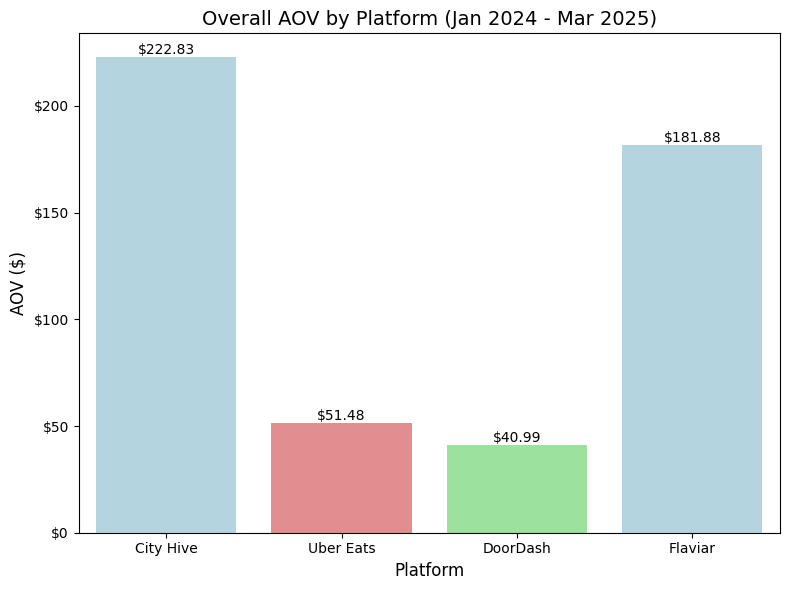

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker



# Load the data
city_hive_df = pd.read_excel('/content/City Hive YTD.xlsx')
uber_df = pd.read_excel('/content/Uber YTD.xlsx')
doordash_df = pd.read_excel('/content/Doordash YTD.xlsx')
Flaviar_df = pd.read_excel('/content/Flaviar YTD.xlsx')

# Convert dates to datetime
city_hive_df['Date'] = city_hive_df['Time']  # Already in datetime format
uber_df['Date'] = uber_df['Order Date']
doordash_df['Date'] = doordash_df['Date']
Flaviar_df['Date'] = Flaviar_df['Date']

# Define the period: Jan 2024 to Mar 2025
period_start = '2024-01-01'
period_end = '2025-03-31'

# Filter data for the period
# City Hive
city_hive_orders = city_hive_df[
    (city_hive_df['Date'] >= period_start) &
    (city_hive_df['Date'] <= period_end)
]

# Uber Eats (Completed orders only)
uber_orders = uber_df[
    (uber_df['Date'] >= period_start) &
    (uber_df['Date'] <= period_end) &
    (uber_df['Order Status'] == 'Completed')
]

# DoorDash (Completed orders only, assuming Final Order Status == 'Delivered')
doordash_orders = doordash_df[
    (doordash_df['Date'] >= period_start) &
    (doordash_df['Date'] <= period_end) &
    (doordash_df['Final Order Status'] == 'Delivered')
]

Flaviar_orders = Flaviar_df[
    (Flaviar_df['Date'] >= period_start) &
    (Flaviar_df['Date'] <= period_end)
]
# Calculate AOV for each platform
# City Hive
city_hive_revenue = city_hive_orders['Total Amount'].sum()
city_hive_num_orders = len(city_hive_orders)
city_hive_aov = city_hive_revenue / city_hive_num_orders if city_hive_num_orders > 0 else 0

# Uber Eats
uber_revenue = uber_orders['Sales (excl. tax)'].sum()
uber_num_orders = len(uber_orders)
uber_aov = uber_revenue / uber_num_orders if uber_num_orders > 0 else 0

# DoorDash
doordash_revenue = doordash_orders['Subtotal'].sum()
doordash_num_orders = len(doordash_orders)
doordash_aov = doordash_revenue / doordash_num_orders if doordash_num_orders > 0 else 0

Flaviar_revenue = Flaviar_orders['Target Earning'].sum()
Flaviar_num_orders = len(Flaviar_orders)
Flaviar_aov = Flaviar_revenue / Flaviar_num_orders if Flaviar_num_orders > 0 else 0
# Create a DataFrame for visualization
aov_data = pd.DataFrame({
    'Platform': ['City Hive', 'Uber Eats', 'DoorDash', 'Flaviar'],
    'AOV': [city_hive_aov, uber_aov, doordash_aov, Flaviar_aov]
})

# Print the results
print("\nOverall AOV for Each Platform (Jan 2024 - Mar 2025):")
print(f"City Hive: ${city_hive_aov:.2f} (Total Revenue: ${city_hive_revenue:.2f}, Orders: {city_hive_num_orders})")
print(f"Uber Eats: ${uber_aov:.2f} (Total Revenue: ${uber_revenue:.2f}, Orders: {uber_num_orders})")
print(f"DoorDash: ${doordash_aov:.2f} (Total Revenue: ${doordash_revenue:.2f}, Orders: {doordash_num_orders})")
print(f"Flaviar: ${Flaviar_aov:.2f} (Total Revenue: ${Flaviar_revenue:.2f}, Orders: {Flaviar_num_orders})")

# Create bar chart for AOV by platform
plt.figure(figsize=(8, 6))
bars = sns.barplot(x='Platform', y='AOV', data=aov_data, palette=['lightblue', 'lightcoral', 'lightgreen'])

# Add labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'${height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Format y-axis to show dollar amounts
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:.0f}'))

# Set labels and title
plt.title('Overall AOV by Platform (Jan 2024 - Mar 2025)', fontsize=14)
plt.ylabel('AOV ($)', fontsize=12)
plt.xlabel('Platform', fontsize=12)

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
plt.savefig('aov_by_platform.png')
plt.show()

# Download the plot
files.download('aov_by_platform.png')


Sales Contribution by Platform by Month (Jan 2024 - Mar 2025):

01/2024:
City Hive: $162,660.10

02/2024:
City Hive: $159,136.29

03/2024:
City Hive: $180,452.36
Uber Eats: $30,355.76
DoorDash: $1,906.79

04/2024:
Uber Eats: $49,031.86
City Hive: $164,182.69
DoorDash: $2,912.35

05/2024:
Uber Eats: $47,299.62
City Hive: $188,300.25
DoorDash: $4,496.07

06/2024:
City Hive: $192,471.57
Uber Eats: $57,633.35
DoorDash: $5,544.62

07/2024:
Uber Eats: $56,594.69
City Hive: $171,056.17
DoorDash: $7,028.68

08/2024:
City Hive: $173,283.24
Uber Eats: $58,403.19
Flaviar: $3,541.92
DoorDash: $9,745.00

09/2024:
DoorDash: $12,374.57
Flaviar: $2,264.54
Uber Eats: $56,483.77
City Hive: $161,778.92

10/2024:
Uber Eats: $56,769.28
Flaviar: $5,105.02
DoorDash: $12,055.17
City Hive: $178,951.41

11/2024:
DoorDash: $22,029.22
City Hive: $183,498.15
Flaviar: $6,689.30
Uber Eats: $70,302.77

12/2024:
DoorDash: $28,787.57
Uber Eats: $94,762.11
Flaviar: $6,148.79
City Hive: $250,125.92

01/2025:
DoorDash: $

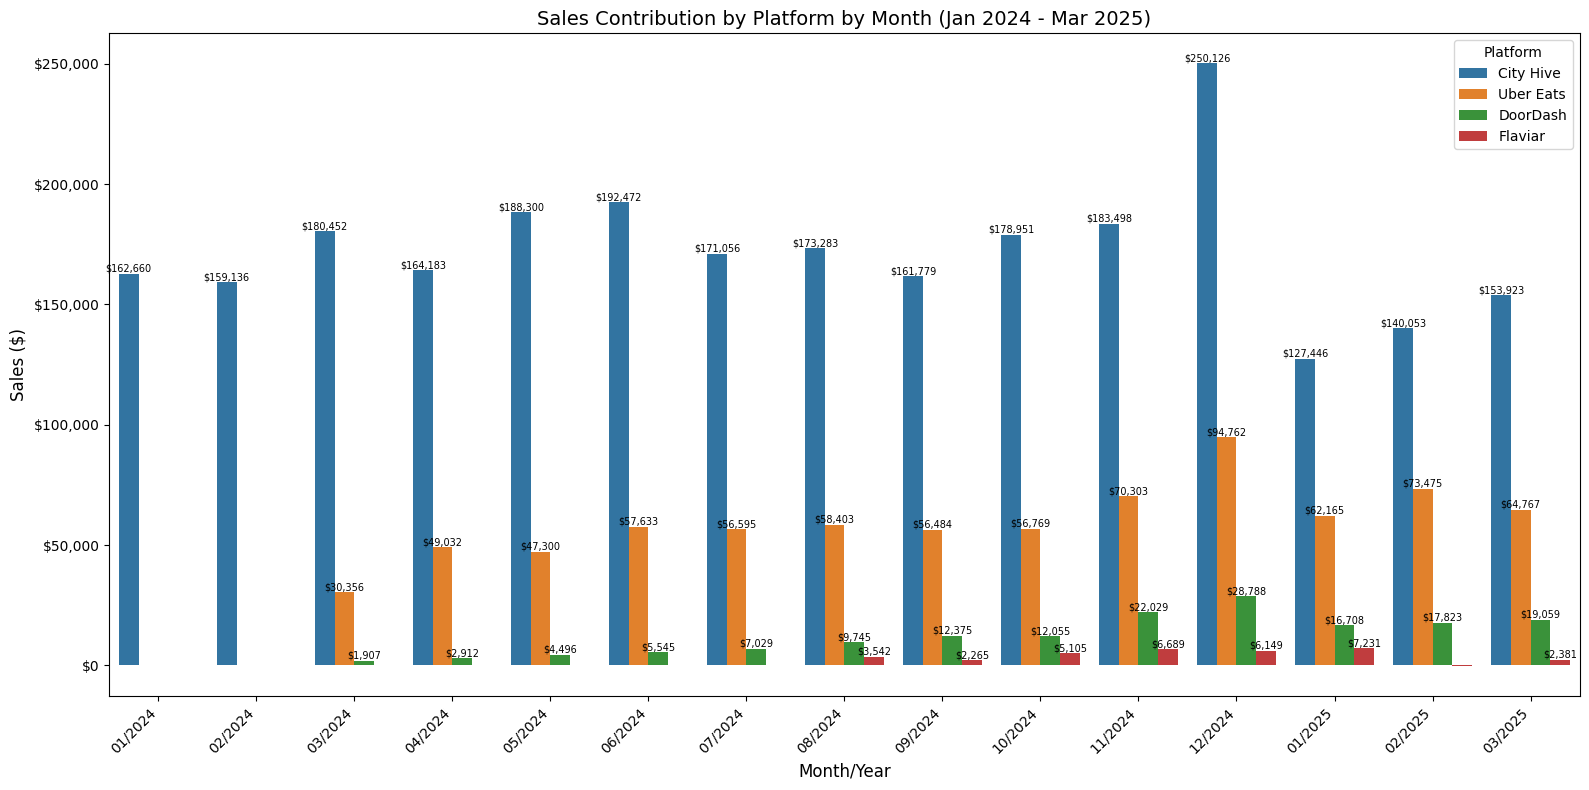

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from google.colab import files

# Load the data
city_hive_df = pd.read_excel('/content/City Hive YTD.xlsx')
uber_df = pd.read_excel('/content/Uber YTD.xlsx')
doordash_df = pd.read_excel('/content/Doordash YTD.xlsx')
Flaviar_df = pd.read_excel('/content/Flaviar YTD.xlsx')

# Convert dates to datetime
city_hive_df['Date'] = city_hive_df['Time']  # Already in datetime format
uber_df['Date'] = uber_df['Order Date']
doordash_df['Date'] = doordash_df['Date']
Flaviar_df['Date'] = pd.to_datetime(Flaviar_df['Date']) # Corrected to convert 'Date' to datetime

# Define the period: Jan 2024 to Mar 2025
period_start = '2024-01-01'
period_end = '2025-03-31'

# Filter data for the period
# City Hive
city_hive_monthly = city_hive_df[(city_hive_df['Date'] >= period_start) & (city_hive_df['Date'] <= period_end)]

# Uber Eats (Completed orders only)
uber_monthly = uber_df[(uber_df['Date'] >= period_start) & (uber_df['Date'] <= period_end) & (uber_df['Order Status'] == 'Completed')]

# DoorDash (Completed orders only, assuming Final Order Status == 'Delivered')
doordash_monthly = doordash_df[(doordash_df['Date'] >= period_start) & (doordash_df['Date'] <= period_end) & (doordash_df['Final Order Status'] == 'Delivered')]

# Flaviar
Flaviar_monthly = Flaviar_df[(Flaviar_df['Date'] >= period_start) & (Flaviar_df['Date'] <= period_end)]

# Calculate monthly sales for each platform
city_hive_sales_monthly = city_hive_monthly.groupby(city_hive_monthly['Date'].dt.strftime('%m/%Y'))['Disbursement Plus Cityhive Credit'].sum().reset_index()
uber_sales_monthly = uber_monthly.groupby(uber_monthly['Date'].dt.strftime('%m/%Y'))['Total '].sum().reset_index()
doordash_sales_monthly = doordash_monthly.groupby(doordash_monthly['Date'].dt.strftime('%m/%Y'))['Credit'].sum().reset_index()
Flaviar_sales_monthly = Flaviar_monthly.groupby(Flaviar_monthly['Date'].dt.strftime('%m/%Y'))['Target Earning'].sum().reset_index()

# Add platform identifier
city_hive_sales_monthly['Platform'] = 'City Hive'
uber_sales_monthly['Platform'] = 'Uber Eats'
doordash_sales_monthly['Platform'] = 'DoorDash'
Flaviar_sales_monthly['Platform'] = 'Flaviar'

# Rename columns for consistency
city_hive_sales_monthly.rename(columns={'Disbursement Plus Cityhive Credit': 'Sales', 'Date': 'Month_Year'}, inplace=True)
uber_sales_monthly.rename(columns={'Total ': 'Sales', 'Date': 'Month_Year'}, inplace=True)
doordash_sales_monthly.rename(columns={'Credit': 'Sales', 'Date': 'Month_Year'}, inplace=True)
Flaviar_sales_monthly.rename(columns={'Target Earning': 'Sales', 'Date': 'Month_Year'}, inplace=True)

# Combine the data
sales_data_monthly = pd.concat([city_hive_sales_monthly, uber_sales_monthly, doordash_sales_monthly, Flaviar_sales_monthly], ignore_index=True)

# Sort by Month_Year chronologically
sales_data_monthly['YearMonth'] = pd.to_datetime(sales_data_monthly['Month_Year'], format='%m/%Y')
sales_data_monthly = sales_data_monthly.sort_values('YearMonth').drop(columns='YearMonth')

# Print the results
print("\nSales Contribution by Platform by Month (Jan 2024 - Mar 2025):")
for month in sales_data_monthly['Month_Year'].unique():
    print(f"\n{month}:")
    monthly_subset = sales_data_monthly[sales_data_monthly['Month_Year'] == month]
    for _, row in monthly_subset.iterrows():
        print(f"{row['Platform']}: ${row['Sales']:,.2f}")

# Create a bar chart with separate bars for each platform
plt.figure(figsize=(16, 8))
g = sns.barplot(data=sales_data_monthly, x='Month_Year', y='Sales', hue='Platform', dodge=True)

# Add labels on top of bars
for p in g.patches:
    height = p.get_height()
    if height > 500:  # Only label bars with sales > $500 to avoid clutter
        g.text(
            p.get_x() + p.get_width() / 2,
            height,
            f'${height:,.0f}',
            ha='center',
            va='bottom',
            fontsize=7
        )

# Format y-axis to show dollar amounts
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set labels and title
plt.title('Sales Contribution by Platform by Month (Jan 2024 - Mar 2025)', fontsize=14)
plt.ylabel('Sales ($)', fontsize=12)
plt.xlabel('Month/Year', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
plt.savefig('sales_contribution_by_platform_by_month_separate_bars.png')
plt.show()

# Download the plot
files.download('sales_contribution_by_platform_by_month_separate_bars.png')